# Assignment 8

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit

Data: 
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [10]:
import pandas as pd,matplotlib.pyplot as plt,numpy as np

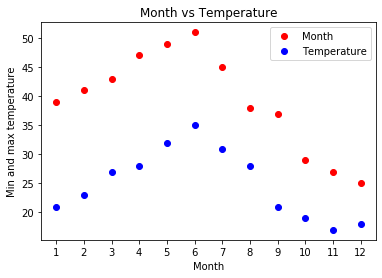

In [19]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(1,13)

plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.legend(["Month","Temperature"])
plt.title("Month vs Temperature")
plt.xticks(months)
plt.show()

In [20]:
#Fitting it to a Periodic Function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

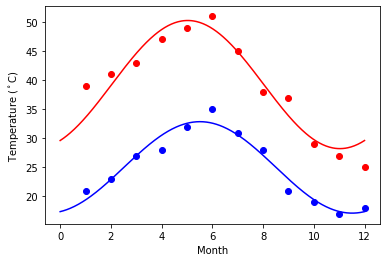

In [23]:
#Plotting the fit
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [24]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

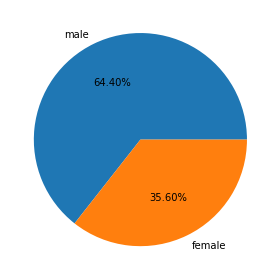

In [53]:
plt.pie(titanic.sex.value_counts(),labels = titanic.sex.value_counts().index,autopct='%1.2f%%')
plt.tight_layout()
plt.show()

In [55]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5, 1.0, 'Fare paid and the Age')

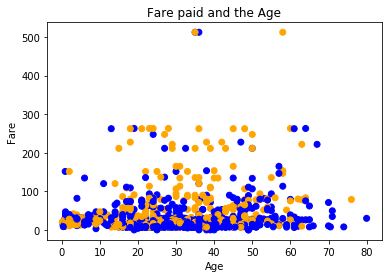

In [110]:
#colors = ['r' if i == 'female' else 'b' for i in titanic.sex]
#plt.scatter(titanic.age,titanic.fare,c = colors,label = colors)
f, ax = plt.subplots(1, 1)
titanic.sex.fillna('male',inplace=True)
colors = {'male':'blue', 'female':'orange'}
ax.scatter(titanic.age,titanic.fare,c=titanic['sex'].apply(lambda x: colors[x]))
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_title('Fare paid and the Age')